In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
import re
from matplotlib.offsetbox import AnchoredText
sns.set_style("white")
sns.set_context("talk")
%matplotlib inline 

In [2]:
df = pd.read_csv("plate1/high_expression/plate1_high_expression_fluorescence_vs_temperature.csv")

In [3]:
df_tm = pd.read_csv('plate1/high_expression/plate1_high_expression_manual_Tm_detection.csv', header=1)

In [4]:
temps = list(df['X'])

In [5]:
col_to_keep = [x for x in df.columns if not re.match('X', x)]
df_data = df[col_to_keep]

In [6]:
df4= pd.read_csv("plate4/high_expression/plate4_high_expression_fluorescence_vs_temperature.csv")
col_to_keep = [x for x in df4.columns if not re.match('X', x)]
df_data4 = df4[col_to_keep]
df_tm4 = pd.read_csv('plate4/high_expression/plate4_high_expression_manual_Tm_detection.csv', header=1)
temps4 = list(df4['X'])

In [10]:
df_exp = pd.read_excel('/Users/albaness/github/kinase-ecoli-expression-panel/expression_data/96-kinase/470_Report_Expression_Test_Results.xls')
list_of_wells = [x.split(':')[0] for x in col_to_keep]
df_exp = df_exp[df_exp.Well.isin(list_of_wells)]
kinase_names = list(df_exp[ 'target ID'])
kinase_names = [x.split('_')[0] for x in kinase_names]
wells = list(df_exp[ 'Well'])
kinase_dict = dict(zip(wells, kinase_names))

In [11]:
kinase_dict

{'C12': 'VRK3',
 'C5': 'KC1G1',
 'C6': 'DYR1A',
 'D1': 'PMYT1',
 'D10': 'MK11',
 'D3': 'GAK',
 'D9': 'KC1G3',
 'E5': 'CSK',
 'G5': 'STK3',
 'H11': 'FES',
 'H5': 'MK14',
 'H6': 'VRK1',
 'H7': 'MK13',
 'H8': 'MK03'}

In [12]:
df_low4= pd.read_csv("plate4/low_expression/plate4_low_expression_fluorescence_vs_temperature.csv")
col_to_keeplow4 = [x for x in df_low4.columns if not re.match('X', x)]
df_data_low4 = df_low4[col_to_keeplow4]
#df_lowtm = pd.read_csv('plate4/low_expression/plate4_low_expression_manual_Tm_detection.txt', header=1)
temps_low4 = list(df_low4['X'])

df_low= pd.read_csv("plate1/low_expression/plate1_low_expression_fluorescence_vs_temperature.csv")
col_to_keeplow = [x for x in df_low.columns if not re.match('X', x)]
df_data_low = df_low[col_to_keeplow]
#df_lowtm = pd.read_csv('plate4/low_expression/plate4_low_expression_manual_Tm_detection.txt', header=1)
temps_low = list(df_low['X'])

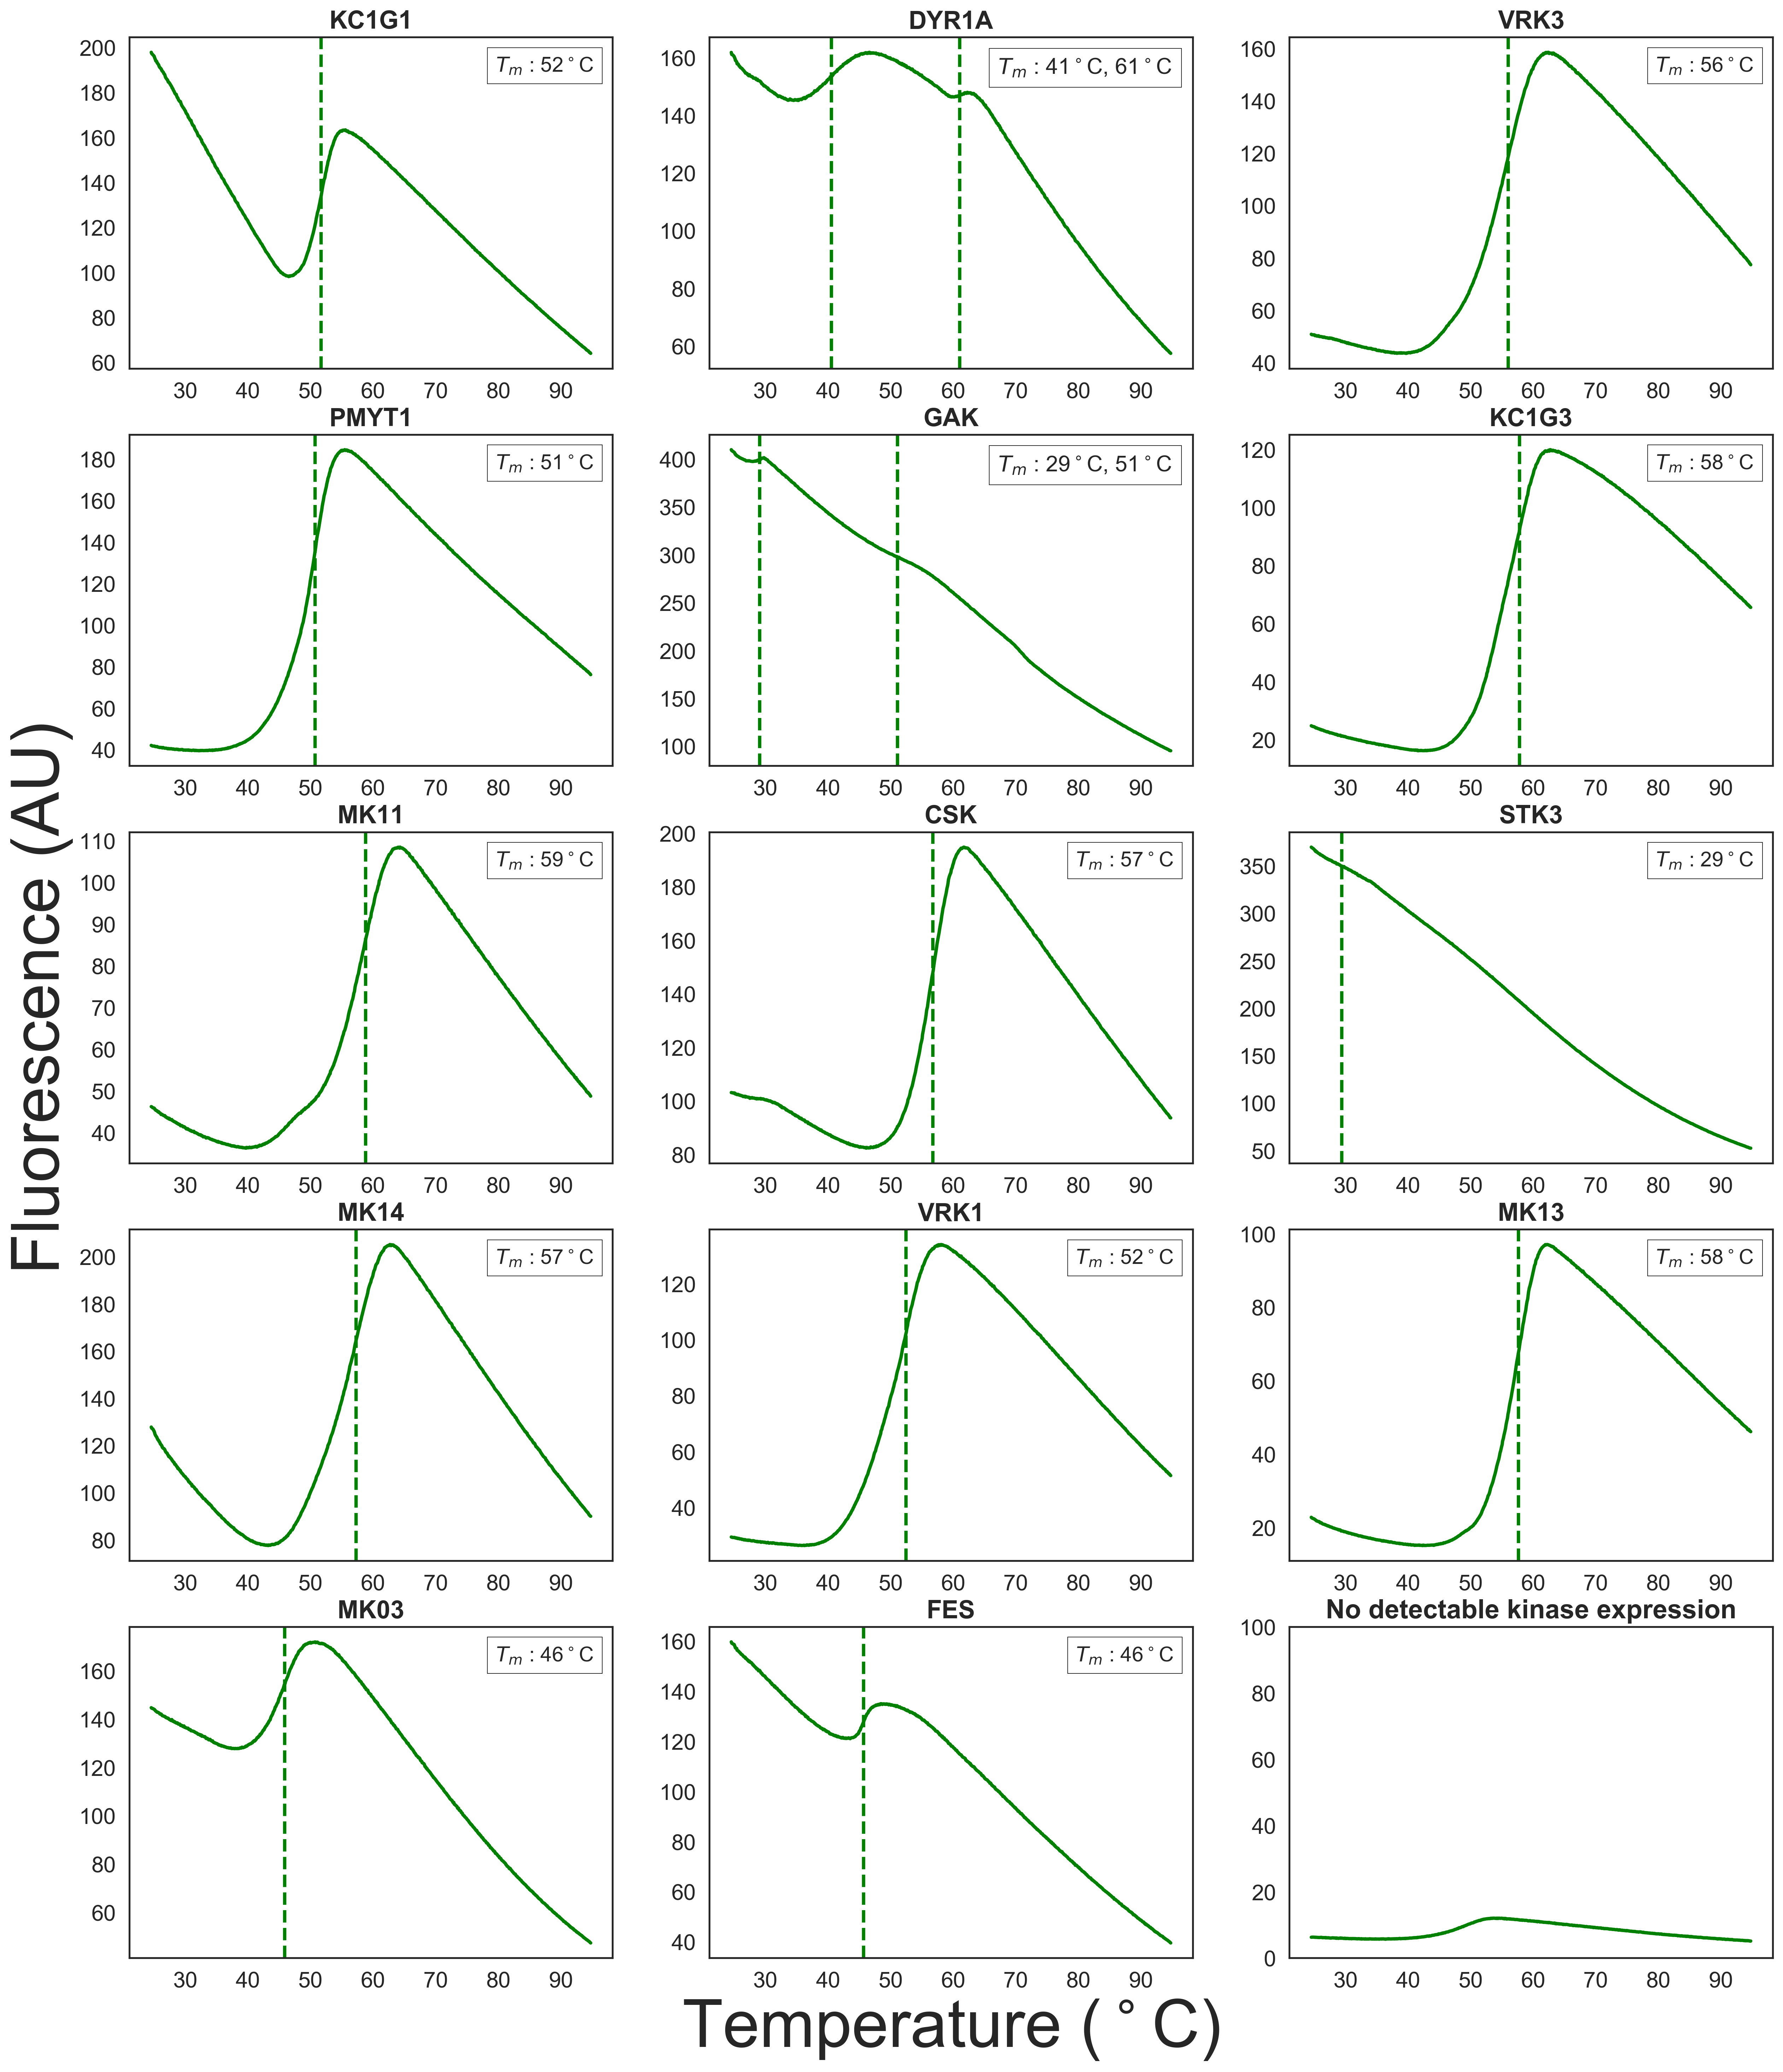

In [19]:
fig = plt.figure(figsize=(20,24), dpi=300)
for i,col in enumerate(col_to_keep):
    well = list_of_wells[i]
    index = i +1
    ax = fig.add_subplot(5,3,index)
    #plt.plot(temps, df_data[col], color='blue')
    plt.plot(temps4, df_data4[col], color='green')
    #plt.axvline(x=list(df_tm['Tm1'])[i], color='blue', linestyle='--')
    plt.axvline(x=list(df_tm4['Tm1'])[i], color='green', linestyle='--')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('%s' % kinase_dict[well], fontsize=17, fontweight='bold')
    if i == 13: 
        plt.xlabel('Temperature ($^\circ$C)', fontsize=45)
    if i == 6: 
        plt.ylabel('Fluorescence (AU)', fontsize=45)
    if str(list(df_tm4['Tm2'])[i]) != 'nan': 
        plt.axvline(x=list(df_tm4['Tm2'])[i], color='green', linestyle='--')
        anchored_text = AnchoredText("$T_m$ : %.0f$^\circ$C, %.0f$^\circ$C " % (list(df_tm4['Tm1'])[i], list(df_tm4['Tm2'])[i]) , loc=1, prop=dict(size=15))
    else: 
        anchored_text = AnchoredText("$T_m$ : %.0f$^\circ$C " % (list(df_tm4['Tm1'])[i]) , loc=1, prop=dict(size=14))
    #anchored_text = AnchoredText("$T_m^1$ : %.0f$^\circ$C" % (list(df_tm['Tm1'])[i]) , loc=1, prop=dict(size=15))
    
    ax.add_artist(anchored_text)
    
ax = fig.add_subplot(5,3,15)
#ax.plot(temps_low, df_data_low[col_to_keeplow[0]], color='green')
ax.plot(temps_low4, df_data_low4[col_to_keeplow4[0]], color='green')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_ylim(0, 100)
plt.title('No detectable kinase expression', fontsize=18, fontweight='bold')
    
fig.savefig('bothplates_tm.pdf', dpi=300)

In [77]:
df4_deriv= pd.read_csv("plate4/high_expression/plate4_high_expression_neg_deriv_fluorescence_vs_temperature.csv")
col_to_keep_4deriv = [x for x in df4_deriv.columns if not re.match('X', x)]
df_data4_deriv = df4_deriv[col_to_keep_4deriv]
temps4_deriv = list(df4_deriv['X'])

df_deriv= pd.read_csv("plate1/high_expression/plate1_high_expression_neg_der_fluorescence_vs_temperature.csv")
col_to_keep_deriv = [x for x in df_deriv.columns if not re.match('X', x)]
df_data_deriv = df_deriv[col_to_keep_deriv]
temps_deriv = list(df_deriv['X'])

df_low4_deriv= pd.read_csv("plate4/low_expression/plate4_low_expression_neg_deriv_fluorescence_vs_temperature.csv")
col_to_keeplow4_deriv = [x for x in df_low4_deriv.columns if not re.match('X', x)]
df_data_low4_deriv = df_low4_deriv[col_to_keeplow4_deriv]
#df_lowtm = pd.read_csv('plate4/low_expression/plate4_low_expression_manual_Tm_detection.txt', header=1)
temps_low4_deriv = list(df_low4_deriv['X'])

df_low_deriv= pd.read_csv("plate1/low_expression/plate1_low_expression_neg_deriv_fluorescence_vs_temperature.csv")
col_to_keeplow_deriv = [x for x in df_low_deriv.columns if not re.match('X', x)]
df_data_low_deriv = df_low_deriv[col_to_keeplow_deriv]
#df_lowtm = pd.read_csv('plate4/low_expression/plate4_low_expression_manual_Tm_detection.txt', header=1)
temps_low_deriv = list(df_low_deriv['X'])

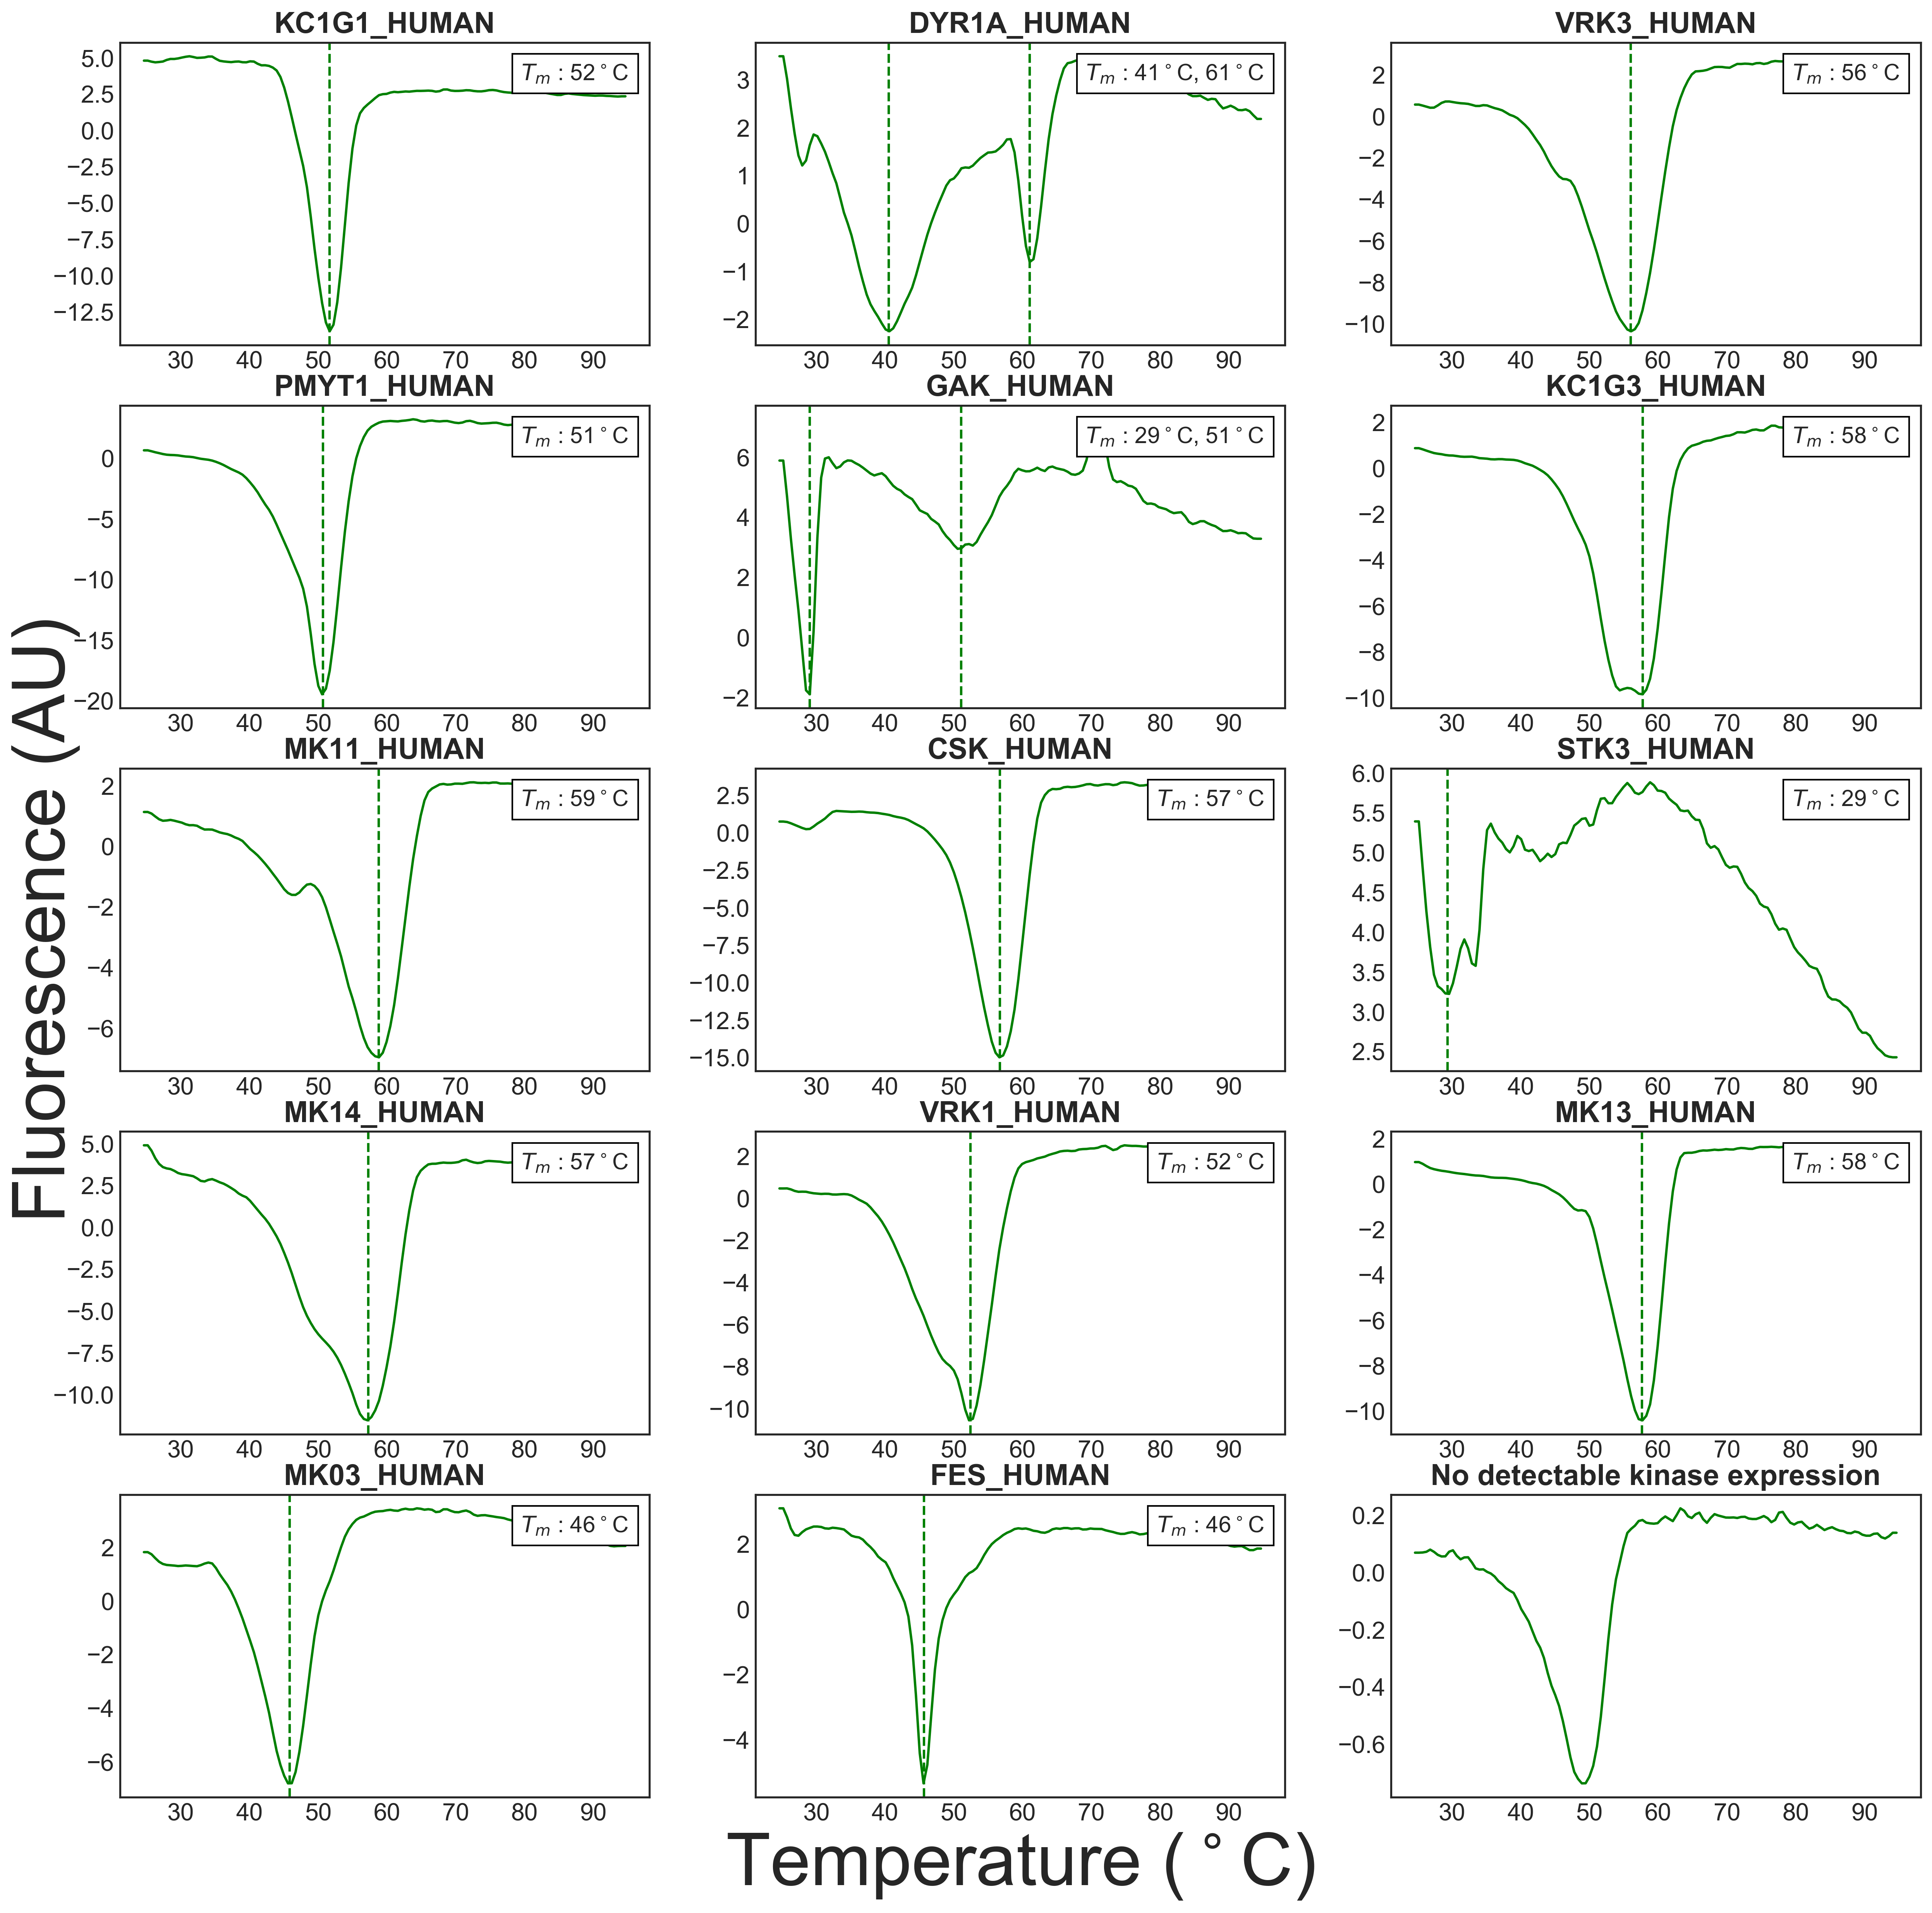

In [83]:
fig = plt.figure(figsize=(20,20), dpi=300)
for i,col in enumerate(col_to_keep):
    well = list_of_wells[i]
    index = i +1
    ax = fig.add_subplot(5,3,index)
    #plt.plot(temps_deriv, df_data_deriv[col], color='blue')
    plt.plot(temps4_deriv, df_data4_deriv[col], color='green')
    #plt.axvline(x=list(df_tm['Tm1'])[i], color='blue', linestyle='--')
    plt.axvline(x=list(df_tm4['Tm1'])[i], color='green', linestyle='--')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('%s' % kinase_dict[well], fontsize=18, fontweight='bold')
    if i == 13: 
        plt.xlabel('Temperature ($^\circ$C)', fontsize=45)
    if i == 6: 
        plt.ylabel('Fluorescence (AU)', fontsize=45)
    if str(list(df_tm4['Tm2'])[i]) != 'nan': 
        plt.axvline(x=list(df_tm4['Tm2'])[i], color='green', linestyle='--')
        anchored_text = AnchoredText("$T_m$ : %.0f$^\circ$C, %.0f$^\circ$C " % (list(df_tm4['Tm1'])[i], list(df_tm4['Tm2'])[i]) , loc=1, prop=dict(size=14))
    else: 
        anchored_text = AnchoredText("$T_m$ : %.0f$^\circ$C " % (list(df_tm4['Tm1'])[i]) , loc=1, prop=dict(size=14))
    #anchored_text = AnchoredText("$T_m^1$ : %.0f$^\circ$C" % (list(df_tm['Tm1'])[i]) , loc=1, prop=dict(size=15))
    
    ax.add_artist(anchored_text)
    
ax = fig.add_subplot(5,3,15)
ax.plot(temps_low4_deriv, df_data_low4_deriv[col_to_keeplow4_deriv[0]], color='green')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('No detectable kinase expression', fontsize=18, fontweight='bold')
    
fig.savefig('neg_deriv_tm.pdf', dpi=300)